#### IMPORTANT INFORMATION
The following facet chart helps determine the best option (XP or 2P) based on the game scenario. For instance, if there’s less than 1 minute left in the game and your team scores a touchdown to go up by 1 point, opting for a 2-point conversion is the better choice, regardless of the projected success rate. This is because being up 2 points (after a successful XP) is essentially the same as being up 1 point if the 2P attempt or XP miss occurs. Even if the 2P attempt has only a 10% chance of success, it should still be attempted, as securing a 3-point lead ensures that if the opposing team scores a field goal, the game will be tied if the 2P is successful, or they will win if the 2P fails (but making the XP and allowing a field goal still results in a loss).

In [1]:
%pip install numpy matplotlib seaborn

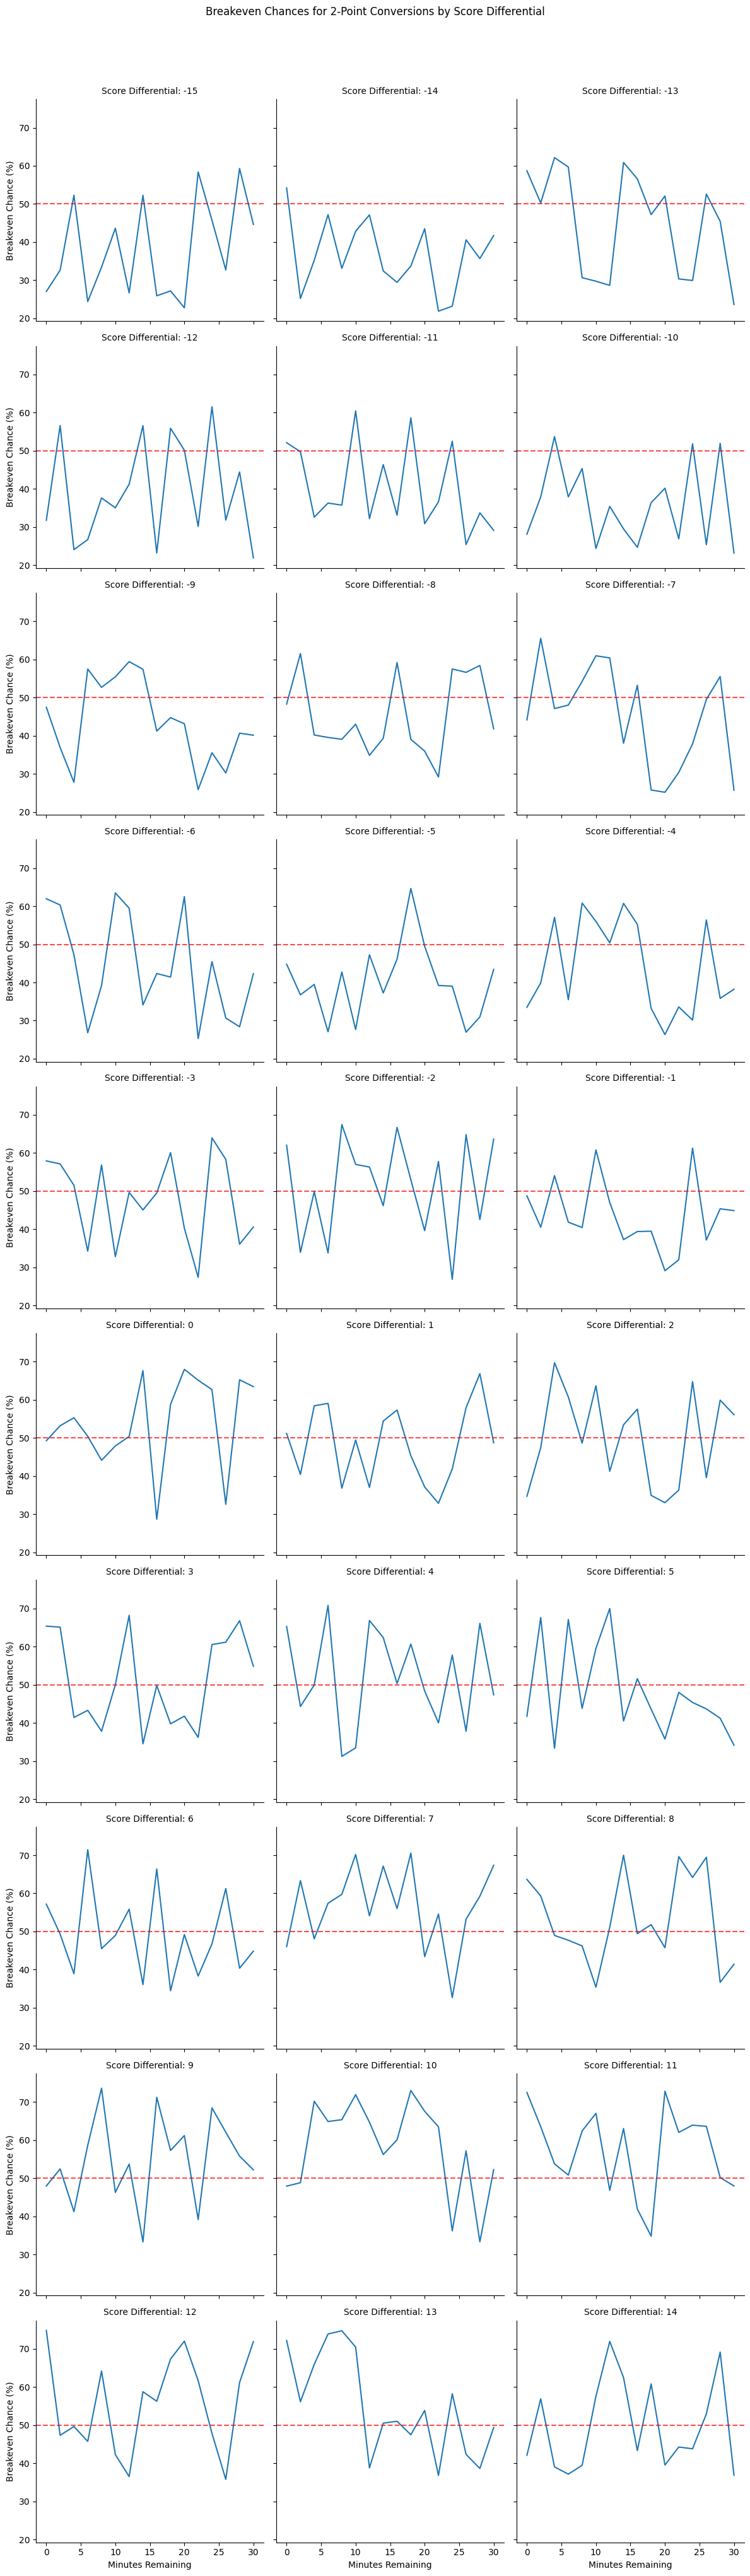

In [3]:
# Importing packages that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create score_differential from -15 to 14
score_differential = [i for i in range(-15, 15)]

# Create minutes_remaining with 2-minute intervals, counting down from 30
minutes_remaining = np.arange(30, -1, -2)  # From 30 to 0 in steps of -2

# Generate sample data
data = []

for score in score_differential:
    for minute in minutes_remaining:
        breakeven_chance = np.random.uniform(30, 70) + (score * 0.5) - (minute * 0.1)
        data.append([score, minute, breakeven_chance])

# Create a DataFrame
df = pd.DataFrame(data, columns=['score_differential', 'minutes_remaining', 'breakeven_chance'])

# Set up the FacetGrid
g = sns.FacetGrid(df, col="score_differential", col_wrap=3, height=4, sharey=True, sharex=True)

# Plot each line chart
g.map(sns.lineplot, "minutes_remaining", "breakeven_chance")

# Add a reference line at 50% breakeven chance
for ax in g.axes.flat:
    ax.axhline(50, ls='--', color='red', alpha=0.7)

# Reverse the x-axis for each plot (minutes remaining)
for ax in g.axes.flat:
    ax.invert_xaxis()

# Customize labels and titles
g.set_axis_labels("Minutes Remaining", "Breakeven Chance (%)")
g.set_titles("Score Differential: {col_name}")
g.fig.suptitle("Breakeven Chances for 2-Point Conversions by Score Differential", y=1.02)

plt.tight_layout()
plt.show()